In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Latex

In [35]:
from scipy.stats import f

In [18]:
import warnings
warnings.filterwarnings('ignore')

# Heteroscedasticity

## Introduction

Models with **heteroscedasticity** are those where the variance of the error term is not constant across all levels of the independent variables. 
Examples include standard regression models in fields like finance, time series, and cross-sectional studies, particularly when dealing with data that has a wide range of values or changes significantly over time. 

Models designed to specifically account for this include those using 
* ARCH (Autoregressive Conditional Heteroscedasticity) or 
* GARCH (Generalized ARCH) specifications, or 
* those employing weighted least squares (WLS) or 
* robust estimation methods to correct for the non-constant variance. 

You can test for **heteroscedasticity** in regression models using formal statistical tests like the **Breusch-Pagan** and **White** tests, which check if the variance of the residuals is constant. 
Other common tests include the **Goldfeld-Quandt** test, suitable for cases with a suspected categorical variable driving heteroscedasticity, and the **Glejser** and **Park** tests. 

These tests involve performing an auxiliary regression on the residuals from the original model and then rejecting the null hypothesis of homoscedasticity if the results are statistically significant. 

## Goldfeld-Quandt

The **Goldfeld-Quandt (GQ)** test is a statistical method to detect heteroskedasticity by comparing the residual sum of squares (RSS) of two separate OLS regressions. 
First, data is sorted by an independent variable, with central observations optionally removed. 
The remaining data is split into two groups, and the model is estimated for each, yielding two RSS values (RSS1 and RSS2). 
The test then uses an F-statistic, formed by the ratio of these RSS values (appropriately scaled), to determine if the variances are significantly different, which would indicate heteroskedasticity. 

### Steps for performing the Goldfeld-Quandt test

#### 1. **Sort the data**:

Arrange the observations in ascending order based on the values of one of the independent variables. Choose the variable you suspect is related to the variance of the error term.

#### 2. **Divide the data**:

Remove a specified number of central observations and divide the remaining data into two equal groups. The first group should contain the observations with the lowest values of the chosen independent variable, and the second group should contain the observations with the highest values.

#### 3. **Estimate regressions**:

Perform separate **Ordinary Least Squares (OLS)** regressions on each of the two groups to obtain the residual sum of squares (RSS) for each regression: $RSS_{1}$ and $RSS_{2}$.

#### 4. **Calculate the $F$-statistic**:

Form the $F$-statistic as the ratio of the two RSS values, each divided by its respective degrees of freedom. 
The degrees of freedom for each regression are the number of observations in that group minus the number of parameters in the model.

1. **If variance is expected to increase with the independent variable**: 
    $$F=\frac{RSS_{2}/df_{2}}{RSS_{1}/df_{1}}$$
2. **If variance is expected to decrease**: The ratio is reversed.

#### 5. **Compare with critical value**:

Compare the calculated $F$-statistic to the critical $F$-value from an $F$-distribution table at your chosen significance level.

#### 6. **Draw a conclusion**:

1. If the calculated $F$-statistic is greater than the critical $F$-value, reject the null hypothesis of **homoskedasticity** and conclude that heteroskedasticity is present.
2. If the calculated $F$-statistic is less than or equal to the critical $F$-value, do not reject the null hypothesis, suggesting **homoskedasticity**. 

### Testing

In [9]:
df = pd.DataFrame({'x': [190.9, 171.9, 319.4, 64.9, 312.4, 116.3, 161, 188.6, 231.7, 77.8, 4.1, 146.1, 193, 260.3, 2.5, 2.6],
                   'y': [56.6, 42.2, 105.2, 6.7, 102.3, 44.3, 18.4, 39.1, 90.9, 11.7, 0.2, 51.7, 55.4, 89.7, 1.5, 1.3]})

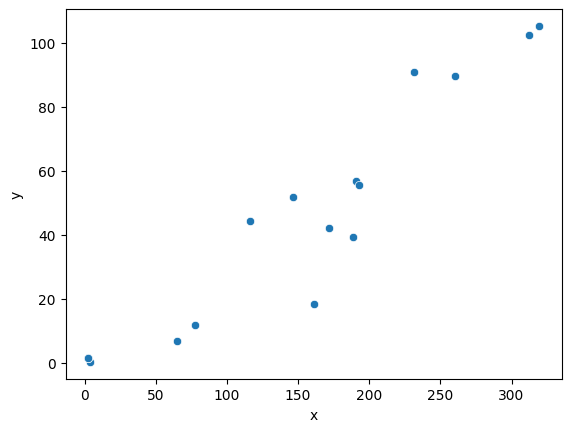

In [10]:
sns.scatterplot(df, x='x', y='y')
plt.show()

#### 1. **Sort the data**:

In [12]:
df = df.sort_values(by='x')
df

,x,y
14,2.5,1.5
15,2.6,1.3
10,4.1,0.2
3,64.9,6.7
9,77.8,11.7
5,116.3,44.3
11,146.1,51.7
6,161.0,18.4
1,171.9,42.2
7,188.6,39.1


#### 2. **Divide the data**:

In [13]:
df1 = df.iloc[:6, :]
df1

,x,y
14,2.5,1.5
15,2.6,1.3
10,4.1,0.2
3,64.9,6.7
9,77.8,11.7
5,116.3,44.3


In [14]:
df2 = df.iloc[-6:, :]
df2

,x,y
0,190.9,56.6
12,193.0,55.4
8,231.7,90.9
13,260.3,89.7
4,312.4,102.3
2,319.4,105.2


#### 3. **Estimate regressions**:

##### `df1`

In [15]:
x1 = df1.x
y1 = df1.y

In [19]:
display(Latex(f"$\sum xy = {np.inner(x1, y1)}$"))
display(Latex(f"$\sum x = {np.sum(x1)}$"))
display(Latex(f"$\sum y = {np.sum(y1)}$"))
display(Latex(f"$\sum x^2 = {sum([num ** 2 for num in x1])}$"))
display(Latex(f"$\sum y^2 = {sum([num ** 2 for num in y1])}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [40]:
beta1 = (len(x1)*np.inner(x1, y1)-np.sum(x1)*np.sum(y1))/(len(x1)*sum([num ** 2 for num in x1]) - np.sum(x1)*np.sum(x1))
beta1

np.float64(0.30158842849198175)

In [41]:
# beta = 2.1724
alpha1 = (np.sum(y1) - beta1 * np.sum(x1))/len(x1)
alpha1

np.float64(-2.5310027535915864)

##### `df2`

In [116]:
x2 = df2.x
y2 = df2.y

In [117]:
display(Latex(f"$\sum xy = {np.inner(x2, y2)}$"))
display(Latex(f"$\sum x = {np.sum(x2)}$"))
display(Latex(f"$\sum y = {np.sum(y2)}$"))
display(Latex(f"$\sum x^2 = {sum([num ** 2 for num in x2])}$"))
display(Latex(f"$\sum y^2 = {sum([num ** 2 for num in y2])}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [32]:
beta2 = (len(x2)*np.inner(x2, y2)-np.sum(x2)*np.sum(y2))/(len(x2)*sum([num ** 2 for num in x2]) - np.sum(x2)*np.sum(x2))
beta2

np.float64(0.36518130411108707)

In [33]:
alpha2 = (np.sum(y2) - beta2 * np.sum(x2))/len(x2)
alpha2

np.float64(-8.41397536804764)

#### 4. **Calculate the $F$-statistic**:

In [126]:
TSS1 = sum([num**2 for num in (y1-np.mean(y1))])
RSS1 = sum([num**2 for num in (beta1*x1+alpha1-np.mean(y1))])
ESS1 = TSS1 - RSS1

print(f"TSS = {TSS1}")
print(f"RSS = {RSS1}")
print(f"ESS = TSS - RSS = {ESS1}")

TSS = 1428.8349999999998
RSS = 1076.1700529250782
ESS = TSS - RSS = 352.66494707492166


In [127]:
TSS2 = sum([num**2 for num in (y2-np.mean(y2))])
RSS2 = sum([num**2 for num in (beta2*x2+alpha2-np.mean(y2))])
ESS2 = TSS2 - RSS2

print(f"TSS = {TSS2}")
print(f"RSS = {RSS2}")
print(f"ESS = TSS - RSS = {ESS2}")

TSS = 2430.6150000000002
RSS = 2118.119122385569
ESS = TSS - RSS = 312.49587761443127


In [128]:
fstat = ESS1/ESS2
print(fstat, 1/fstat)

1.1285427179620349 0.8860984915181924


#### 5. **Compare with critical value**:

In [125]:
f_critical = f.ppf(0.95, dfn=4, dfd=4) # f.ppf(1-α, dfn=4, dfd=4)
f_critical

np.float64(6.388232908695868)

In [123]:
f.ppf(0.05, dfn=4, dfd=4) # f.ppf(1-α, dfn=4, dfd=4)

np.float64(0.15653781167539585)

#### 6. **Draw a conclusion**:

In [114]:
if fstat >  f_critical:
    print("Reject the null hypothesis: Heteroskedasticity is likely present.")
else:
    print("Fail to reject the null hypothesis: No significant evidence of heteroskedasticity.")

Fail to reject the null hypothesis: No significant evidence of heteroskedasticity.


### Automated test

In [119]:
import statsmodels.api as sm
import statsmodels.stats.api as sms  

In [121]:
X = sm.add_constant(df[['x']]) # Add a constant for the intercept
model = sm.OLS(df['y'], X).fit()

In [122]:
f_statistic, p_value, _ = sms.het_goldfeldquandt(model.resid, model.model.exog, drop=4, split=6, alternative='two-sided')
print(f_statistic, p_value)

0.886098491518215 0.9095251034120219


In [ ]:
if p_value < 0.05:
    print("Reject the null hypothesis: Heteroskedasticity is likely present.")
else:
    print("Fail to reject the null hypothesis: No significant evidence of heteroskedasticity.")

np.float64(0.6022984755323025)